In [36]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import skimage.io
import skimage.transform
from skimage.io import imsave

from visualization_utils import *

In [33]:
image_file_root = '/Users/sarabeery/Documents/CameraTrapClass/Data/imerit_deer_ims/'

In [35]:
pickle_file = '/Users/sarabeery/Documents/CameraTrapClass/sim_classification/vizualize_activations/train_on_cct/real_deer.p'

data = pickle.load(open(pickle_file,'rb'))

In [4]:
db_file = '/Users/sarabeery/Documents/CameraTrapClass/Fixing_CCT_Anns/Corrected_versions/CaltechCameraTrapsBboxes_v2.json'
bbox_data = json.load(open(db_file,'r'))

In [5]:
cat_id_to_cat = {cat['id']:cat for cat in bbox_data['categories']}
ann_id_to_ann = {ann['id']:ann for ann in bbox_data['annotations']}

In [6]:
print(data.keys())
activations = data['activations']
layer_names = data['layer_names']
labels = data['labels']
ann_ids = data['ids']
logits = data['logits']

['activations', 'logits', 'labels', 'ids', 'layer_names']


In [7]:
print([cat_id_to_cat[ann_id_to_ann[ann_id]['category_id']]['name'] for ann_id in ann_ids])
print(labels)
print([max(softmax(logit)) for logit in logits])

[u'deer', u'deer', u'deer', u'deer', u'deer', u'deer']
[ 6 13  9 13  6  6]
[0.6376497067126115, 0.9460709491062805, 0.8197315031042014, 0.9472206256097211, 0.9012939498214856, 0.9171862403464148]


MaxPool_5a_3x3
(6, 35, 35, 192)
(35, 35, 192)
(35, 35, 192)
(35, 35, 192)
(35, 35, 192)
(35, 35, 192)
(35, 35, 192)
(6, 1000)
(1000, 1000)


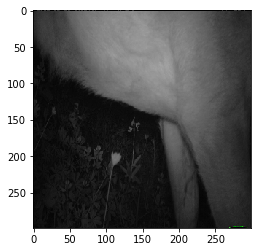

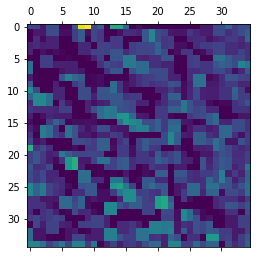

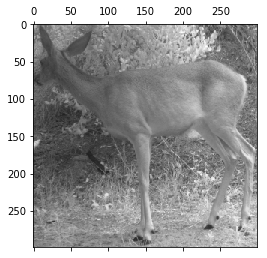

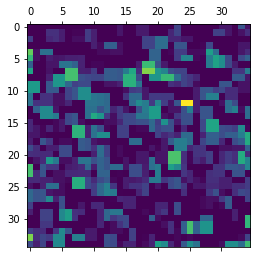

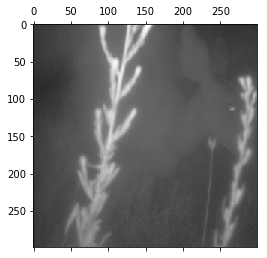

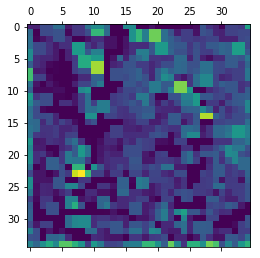

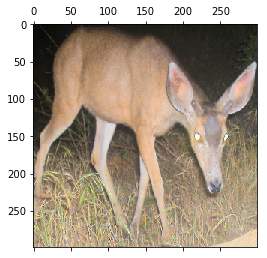

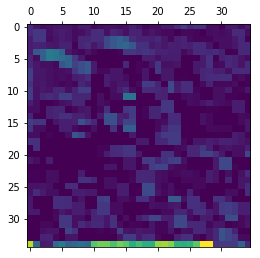

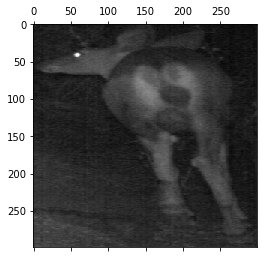

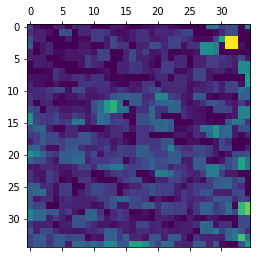

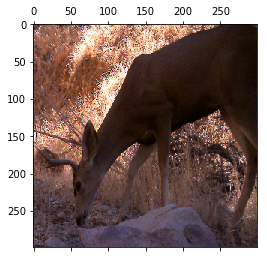

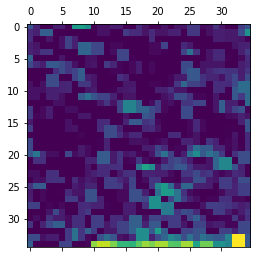

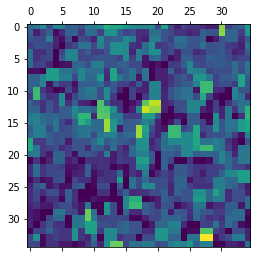

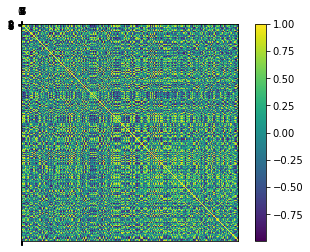

Mixed_5b
(6, 35, 35, 320)
(35, 35, 320)
(35, 35, 320)
(35, 35, 320)
(35, 35, 320)
(35, 35, 320)
(35, 35, 320)
(6, 1000)
(1000, 1000)


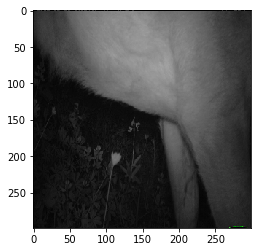

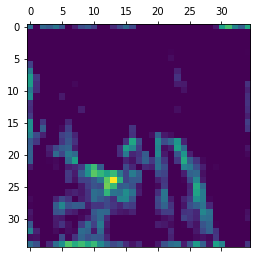

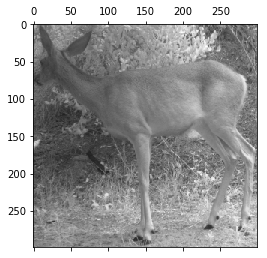

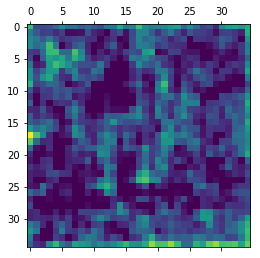

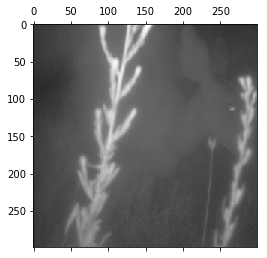

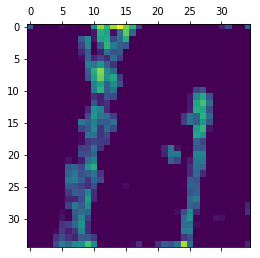

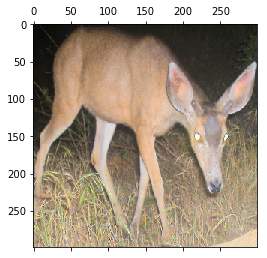

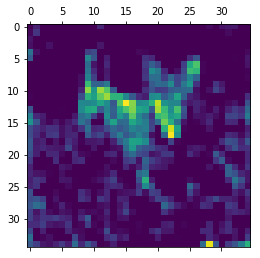

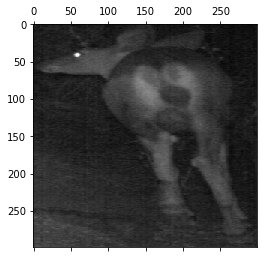

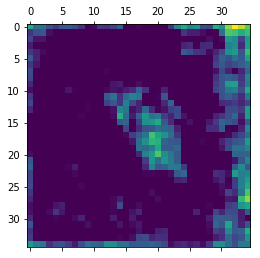

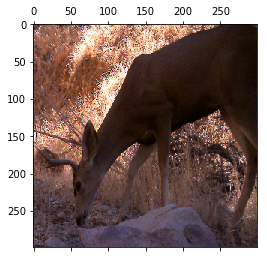

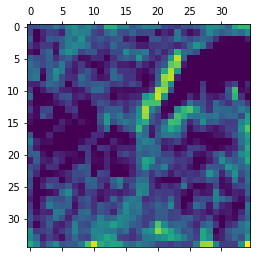

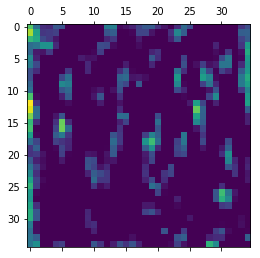

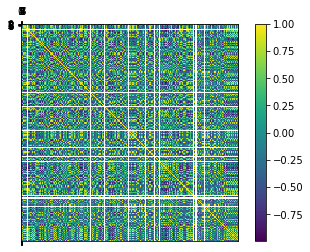

Mixed_6a
(6, 17, 17, 1088)
(17, 17, 1088)
(17, 17, 1088)
(17, 17, 1088)
(17, 17, 1088)
(17, 17, 1088)
(17, 17, 1088)
(6, 1000)
(1000, 1000)


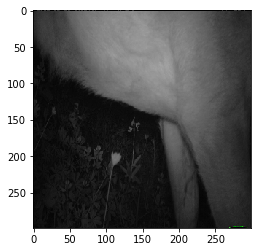

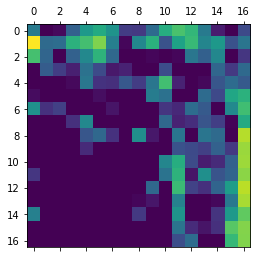

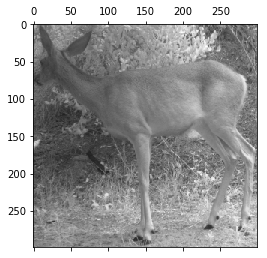

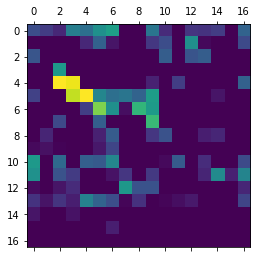

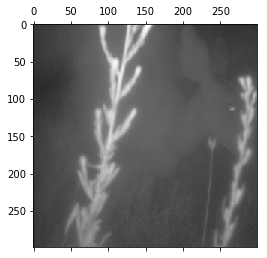

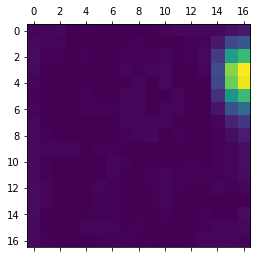

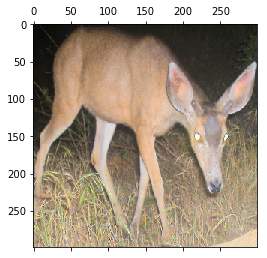

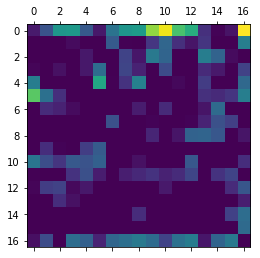

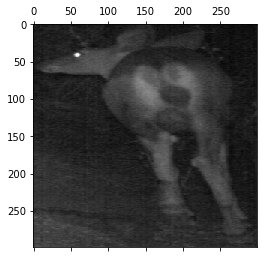

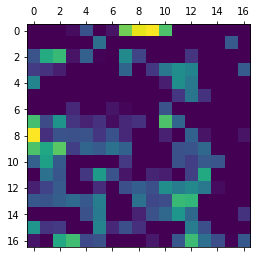

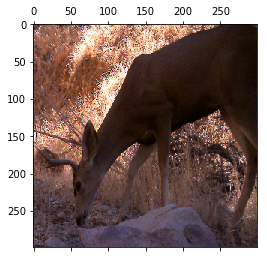

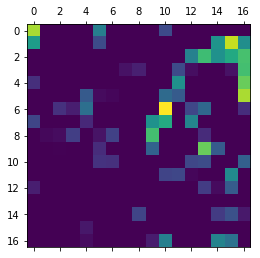

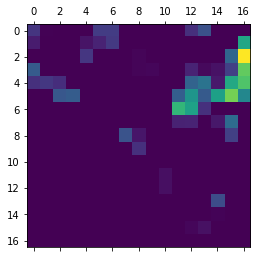

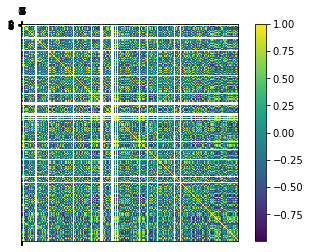

Conv2d_7b_1x1
(6, 8, 8, 1536)
(8, 8, 1536)
(8, 8, 1536)
(8, 8, 1536)
(8, 8, 1536)
(8, 8, 1536)
(8, 8, 1536)
(6, 1000)
(1000, 1000)


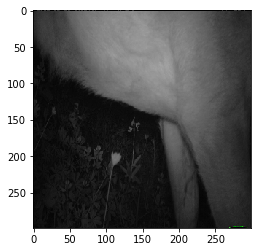

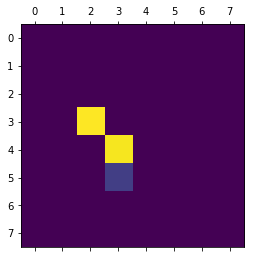

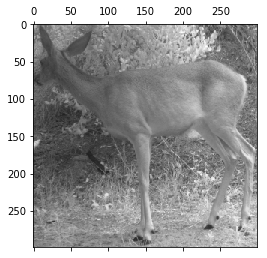

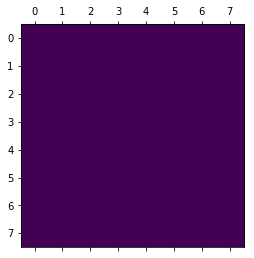

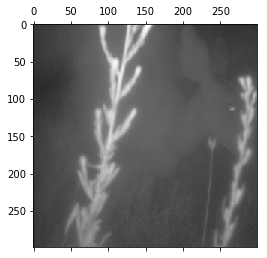

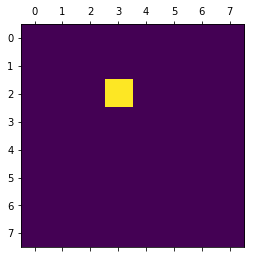

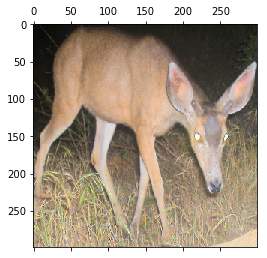

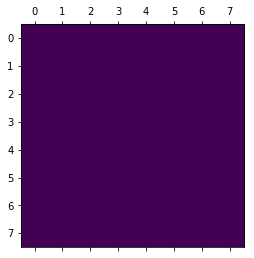

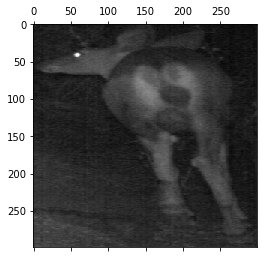

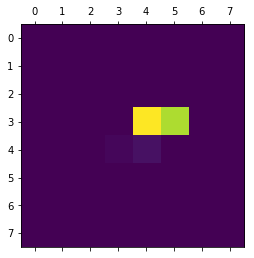

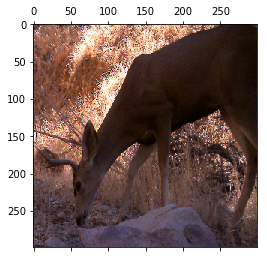

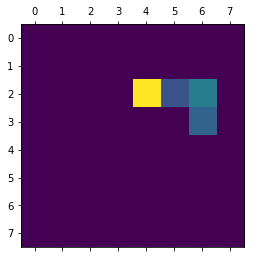

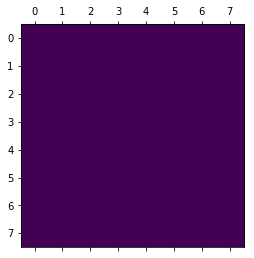

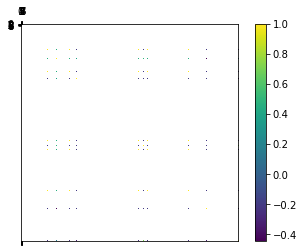

In [31]:
num_elem = 1000
image_idxs = range(len(ann_ids))
for idx,layer_name in enumerate(layer_names):
    print(layer_name)
    layer_activation = activations[idx]
    print(layer_activation.shape)
    vecs = []
    for im_idx in image_idxs:
        im = get_im(ann_id_to_ann[ann_ids[im_idx]],image_file_root,input_size=299)
        plt.imshow(im)
        im_activation = layer_activation[im_idx]
        print(im_activation.shape)
        plt.matshow(im_activation[:,:,0])
        plt.matshow(im_activation[:,:,100])
        im_activation_vec = im_activation.flatten()
        vecs.append(im_activation_vec[:num_elem])
#         plt.bar(range(len(im_activation_vec[:num_elem])),im_activation_vec[:num_elem])
#         plt.show()
    vecmat = np.asarray(vecs)
    print(vecmat.shape)
    df = pd.DataFrame(vecmat)
    correlations = df.corr(method='pearson')
    print(correlations.shape)
    # plot correlation matrix
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations)#, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,9,1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    plt.show()
    
    